## Project: Visualizing Data with Pandas and MatPlotLib

#### Insert project overview here :)
* Analysis of 80000 records of UFO sightings across the globe
* Will include cleaning of dataset, then filtering for relevant data
* Will also include several different visualizations of data using MatPlotLib

##### Analysis Question Ideas:
* Breakdown of hour and frequency of sightings
* Find correlation between shape and duration of sightings
* Box chart of country breakdown OR of duration of sightings

### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [14]:
ufo_df = pd.read_csv("ufo_sightings1.csv", index_col="#")
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64683 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            64683 non-null  object 
 1   City                 64683 non-null  object 
 2   State/Province       59973 non-null  object 
 3   Country              56927 non-null  object 
 4   UFO_Shape            63124 non-null  object 
 5   Length_of_Encounter  64683 non-null  float64
 6   Described_Duration   64683 non-null  object 
 7   Description          64668 non-null  object 
 8   Date_Documented      64683 non-null  object 
 9   Latitude             64683 non-null  float64
 10  Longitude            64683 non-null  float64
dtypes: float64(3), object(8)
memory usage: 5.9+ MB


### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** or **duplicate** values

In [25]:
ufo_df.info()
nonnull_df = ufo_df.dropna()
nonnull_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64683 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            64683 non-null  object 
 1   City                 64683 non-null  object 
 2   State/Province       59973 non-null  object 
 3   Country              56927 non-null  object 
 4   UFO_Shape            63124 non-null  object 
 5   Length_of_Encounter  64683 non-null  float64
 6   Described_Duration   64683 non-null  object 
 7   Description          64668 non-null  object 
 8   Date_Documented      64683 non-null  object 
 9   Latitude             64683 non-null  float64
 10  Longitude            64683 non-null  float64
dtypes: float64(3), object(8)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               ----

### As a Data Analyst, I want to filter my existing DataFrame to remove any irrelevant information
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [16]:
filtered_df = nonnull_df.drop(["Described_Duration","Description", "Date_Documented"], axis=1)
filtered_df.head()

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,10/10/1961 19:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,10/10/1965 23:45,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333


### As a Data Analyst, I want to convert the `Date_Time` column to Pandas' DateTime data type

In [17]:
filtered_df["Date_Time"] = pd.to_datetime(filtered_df["Date_Time"])
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date_Time            53562 non-null  datetime64[ns]
 1   City                 53562 non-null  object        
 2   State/Province       53562 non-null  object        
 3   Country              53562 non-null  object        
 4   UFO_Shape            53562 non-null  object        
 5   Length_of_Encounter  53562 non-null  float64       
 6   Latitude             53562 non-null  float64       
 7   Longitude            53562 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 3.7+ MB


## Visualization with MatPlotLib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **MatPlotLib Bar Graph** to visualize this data
* I will name this chart **UFO Shape Frequency**

Text(0.5, 1.0, 'UFO Shape Frequency')

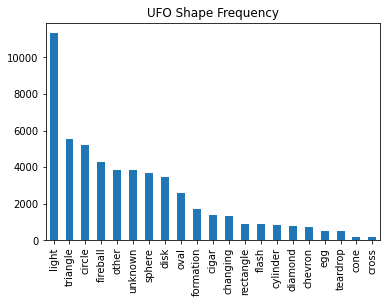

In [26]:
filtered_df.nunique()
shape_count = filtered_df["UFO_Shape"].value_counts()
shape_count
ufo_shape_plot = shape_count.plot(kind='bar')
ufo_shape_plot.set_title("UFO Shape Frequency")

### As a Data Analyst, I want to create a **Pie Chart** to visualize the **percentage breakdown of sightings, by country**

AU        8
CA     2207
GB        8
US    51339
Name: Country, dtype: int64


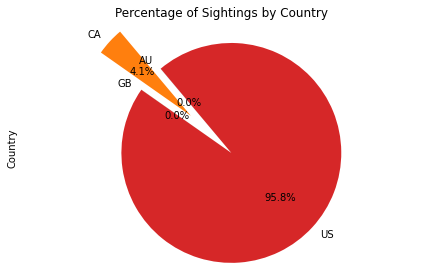

In [19]:
country_count = filtered_df["Country"].value_counts().sort_index()
print(country_count)
fig, ax = plt.subplots(facecolor='white')
country_pie = country_count.plot.pie(autopct='%1.1f%%', startangle=130, explode=(0,0.5,0,0))
country_pie.set_title("Percentage of Sightings by Country")
plt.axis('equal')
plt.tight_layout()
#country_count


### As a Data Analyst, I want to use a **box plot** to visualize the distribution of `Length_of_Encounter` in relation to **day of the week**
* This will require creating a new column of the corresponding day from the `Date_Time` column
* `Length_of_Encounter` represents time in **seconds**
* Use the flag `showfliers=False` to ignore any outliers in the data distribution

<AxesSubplot:title={'center':'Length_of_Encounter'}, xlabel='Day'>

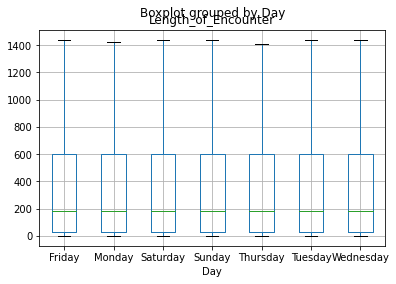

In [20]:
filtered_df["Day"] = filtered_df["Date_Time"].dt.day_name()
box_plot = filtered_df.boxplot(by="Day", column=["Length_of_Encounter"], showfliers=False) #showfliers flag allows us to ignore outliers in data
box_plot

### As a Data Analyst, I want to use a **Bar Graph** to visualize the **Number of Encounters** that occurred on each day of the week

<AxesSubplot:>

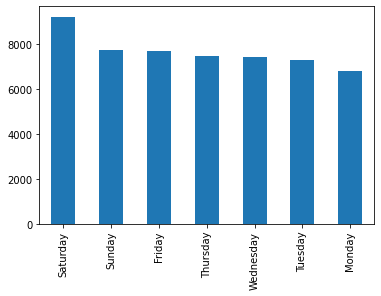

In [21]:
filtered_df["Day"].value_counts().plot(kind="bar")

### As a Data Analyst, I want to use a **Bar Graph** to visualize the **number of encounters**, grouped by each decade

2000    25487
2010    18479
1990     5475
1970     1549
1980     1344
1960      867
1950      287
1940       64
1930        6
1920        3
1910        1
Name: Decade, dtype: int64


<AxesSubplot:>

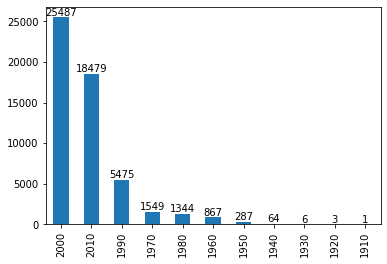

In [22]:
filtered_df["Year"] = filtered_df["Date_Time"].dt.year #Create new series of Year of Encounter
filtered_df["Decade"] = (10 * (filtered_df["Year"] // 10)) #.astype(str) + "'s"
print(filtered_df["Decade"].value_counts())
decade_bar_plot = filtered_df["Decade"].value_counts().plot(kind="bar")
decade_bar_plot.bar_label(decade_bar_plot.containers[0])
decade_bar_plot

### As a Data Analyst, I want to create a **Stacked Bar Graph** using MatPlotLib to display the frequency of **different UFO shape sightings for the top 3 US state with the highest number of sightings**

<AxesSubplot:>

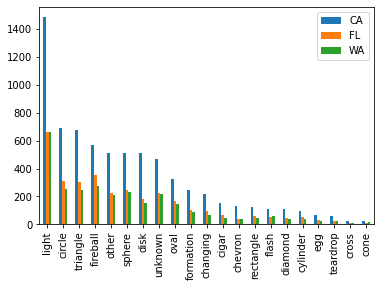

In [27]:
# First group by State/Province, and find the highest count
filtered_df["State/Province"].value_counts()
# Highest frequency is CA with 7135 sightings, followed by FL with 3258, then WA with 2894
# Need to wrap query in backticks as it has a / in the name
california = filtered_df.query('`State/Province` == "CA"')
ca_counts = california["UFO_Shape"].value_counts()
ca_counts.name = "CA"


florida = filtered_df.query('`State/Province` == "FL"')
fl_counts = florida["UFO_Shape"].value_counts()
fl_counts.name = "FL"

washington = filtered_df.query('`State/Province` == "WA"')
wa_counts = washington["UFO_Shape"].value_counts()
wa_counts.name = "WA"

top_three_df = pd.concat([ca_counts, fl_counts, wa_counts], axis=1)
top_three_df.plot(kind="bar")
# X axis as shape of UFO, Y axis as number of value counts for each, for each state
# New DF, shape as index, state as column, value as frequency of that shape (value count)


### As a Data Analyst, I want to create another **Bar Graph** to represent the percentage breakdown of `UFO_Shape` for the countries `US` and `CA`

Text(0.5, 1.0, 'Percentage of UFO Shape Sightings for US & Canada')

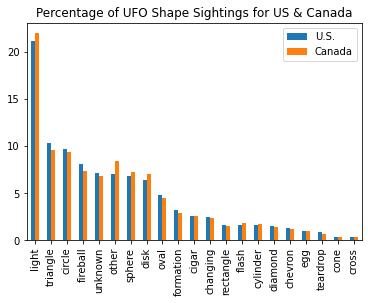

In [49]:
# Filter for just US and CA countries
# Group by value counts for UFO_Shape, using normalization to get percentage value
# Chart in a bar graph
na_sightings = filtered_df.query("`Country` == ['US','CA']")
na_sightings["Country"].value_counts() #Verifying query was successful

# Getting US sightings
us = filtered_df.query('`Country` == "US"')
us_counts = (us["UFO_Shape"].value_counts(normalize=True) * 100)
us_counts.name = "U.S."
# Getting CA Sightings
canada = filtered_df.query('`Country` == "CA"')
canada_counts = (canada["UFO_Shape"].value_counts(normalize=True) * 100)
canada_counts.name = "Canada"

shapes_df = pd.concat([us_counts, canada_counts], axis=1)
shapes_plot = shapes_df.plot(kind="bar")
shapes_plot.set_title("Percentage of UFO Shape Sightings for US & Canada")

### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')


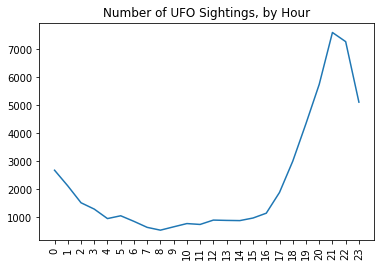

In [112]:
filtered_df.head()
# Create new data frame, with index col as hour of day, 
plt.figure()
filtered_df["Hour"] = filtered_df["Date_Time"].dt.hour
series = filtered_df["Hour"].value_counts().sort_index()
plotted_hours = series.plot(kind="line")
plt.xticks(series.index, rotation='vertical')
plotted_hours.set_title("Number of UFO Sightings, by Hour")
print(series.index)

#Alternative approach, similar outcome
#hour_df = filtered_df.groupby('Hour').size().plot()
#hour_df.set_title("Number of UFO Sightings, by Hour")